# Úkol č. 3 - Segmentace zákazníků e-shopu (do 29. listopadu)

Jednou z důležitých aplikací shlukování je **segmentace zákazníků** (angl. **customer segmentation**). 

Předpokládejme, že máme následující obchodní údaje o prodejích (resp. nákupech z pohledu zákazníků):
TransactionID - ID nákupu,
CustomerID - ID zákazníka, 
Date - datum nákupu, 
Total - celková cena nákupu.

Chceme najít segmenty zákazníků, kteří se chovají podobně. K tomu je dobré informace z jednotlivých nákupů pro individuální zákazníky agregovat. Tj. získat pro každého zákazníka jeden řádek.

Populárním přístupem je **RFM**, což znamená:

- **R**ecency: Počet dnů od posledního nákupu (poslední datum v datasetu pro daného zákazníka).
    - Počet dnů počítejte ke dni uskutečnění poslendní transakce v celém datasetu (tj. 12/19/2015), nikoli k dnešku. Tváříme se, že jde o aktuální data.
- **F**requency: Počet nákupů. Občas se vynechávají zákazníci s jediným nákupem. Pro jednoduchost je zde ale necháme.
- **M**onetary: Celková suma, kterou daný zákazník utratil.

## Zdroj dat
Budeme pracovat s daty z jednoho (skoro) vymyšleného eshopu:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("eshop.csv")

In [49]:
df.head()
# df.info()


,Customer ID,Date,Subtotal,Country
0,34,2007-06-21,86.0,Czech Republic
1,38,2007-06-27,38.4,Czech Republic
2,47,2007-07-02,53.5,Slovakia
3,61,2007-07-14,7.0,Czech Republic
4,78,2007-07-21,55.5,Czech Republic


## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
- Vytvořte `rfm` data frame, kde každý řádek odpovídá jednomu zákazníkovi a sloupce (příznaky) jsou uvedené výše.
- Pomocí algoritmu `K-means` proveďte shlukování. Nějakým způsobem také odhadněte nejlepší počet shluků (podrobně vysvětlete).
- Zabývejte se vlivem přeškálování dat (standardizace příznaků). Tj. určete, zda je přeškálování vhodné, a proveďte ho.
- Interpretujte jednotlivé shluky. Použijte získané shluky k odlišení "superstar" zákazníků (vysoká monetary, vysoká frequency a nízká recency) od nezajímavých  zákazníků (vysoká recency, nízká frequency, nízká monetary).

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
- (až +4 body) Proveďte analýzu vytvořených shluků pomocí metody silhouette (https://en.wikipedia.org/wiki/Silhouette_(clustering)).
- (až +4 body) Zkuste provést to samé s modifikovanou verzí **RFM**, kde Recency = "maximum počtu měsíců od posledního nákupu a čísla 1", Frequency = "maximum počtu nákupů daného zákazníka v posledních 12 měsících a čísla 1", Monetary = "Nejvyšší hodnota nákupu daného zákazníka". Porovnejte s původním přístupem.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook.
  * Ke komentování toho, co v notebooku děláte, použijte Markdown buňky.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni


In [122]:
# vytvor rfm

recency = df[['Customer ID','Date']].groupby(by=['Customer ID']).max().rename(columns={'Date':'Recency'})
recency['Recency'] = (pd.to_datetime('12-19-2015') - recency['Recency']).dt.days
# display(recency)

frequency = df[['Customer ID','Date']].groupby(by=['Customer ID']).count().rename(columns={'Date':'Frequency'})
# display(frequency)

monetary = df[['Customer ID','Subtotal']].groupby(by=['Customer ID']).sum().rename(columns={'Subtotal':'Monetary'})
# display(monetary)

rfm = recency.join([frequency,monetary])
# display(rfm)

X = rfm.to_numpy()
print(X.shape)

(12829, 3)


Vytvoříme slukovaná data pomocí algoritmu k-Means

1. optimalizaci a volbu k nejprve jednoduše odhadneme na základě vykresleného grafu -> najdeme loket

2. optimalizaci provedeme pomocí metody silhouette analysis

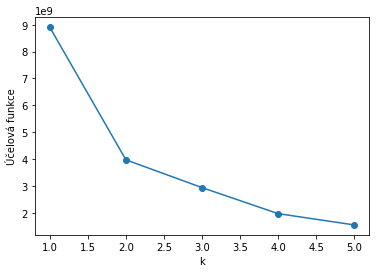

In [123]:
# 1. k-means, odhad k

from sklearn.cluster import KMeans

ix = np.zeros(5)
iy = np.zeros(5)
for k in range(5):
    kmeans = KMeans(n_clusters=k+1, random_state = 1, n_init=2).fit(X)
    iy[k] = kmeans.inertia_
    ix[k] = k+1

plt.xlabel('k')
plt.ylabel('Účelová funkce')
plt.plot(ix, iy, 'o-')
plt.show()

In [125]:
# podle odhadu volím k=2


k = 2
kmeans = KMeans(n_clusters = k, random_state = 1, n_init = 2).fit(X)

# výsledné shluky
print(kmeans.labels_)
# a jejich středy
print(kmeans.cluster_centers_)

[0 1 1 ... 0 0 0]
[[5.25723398e+02 2.06582981e+00 2.06197686e+02]
 [1.76376330e+03 1.38089662e+00 9.80567497e+01]]
